# **IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


# **READING THE DATA**

In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# **DATA PREPARATION**

# CHECKING MISSING VALUES

In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

# **EXPLORATORY DATA ANALYSIS**

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
turnover_rate = df.left.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

In [8]:
mean_satisfaction = df["satisfaction_level"].mean()
mean_satisfaction

0.6128335222348156

# HISTOGRAM

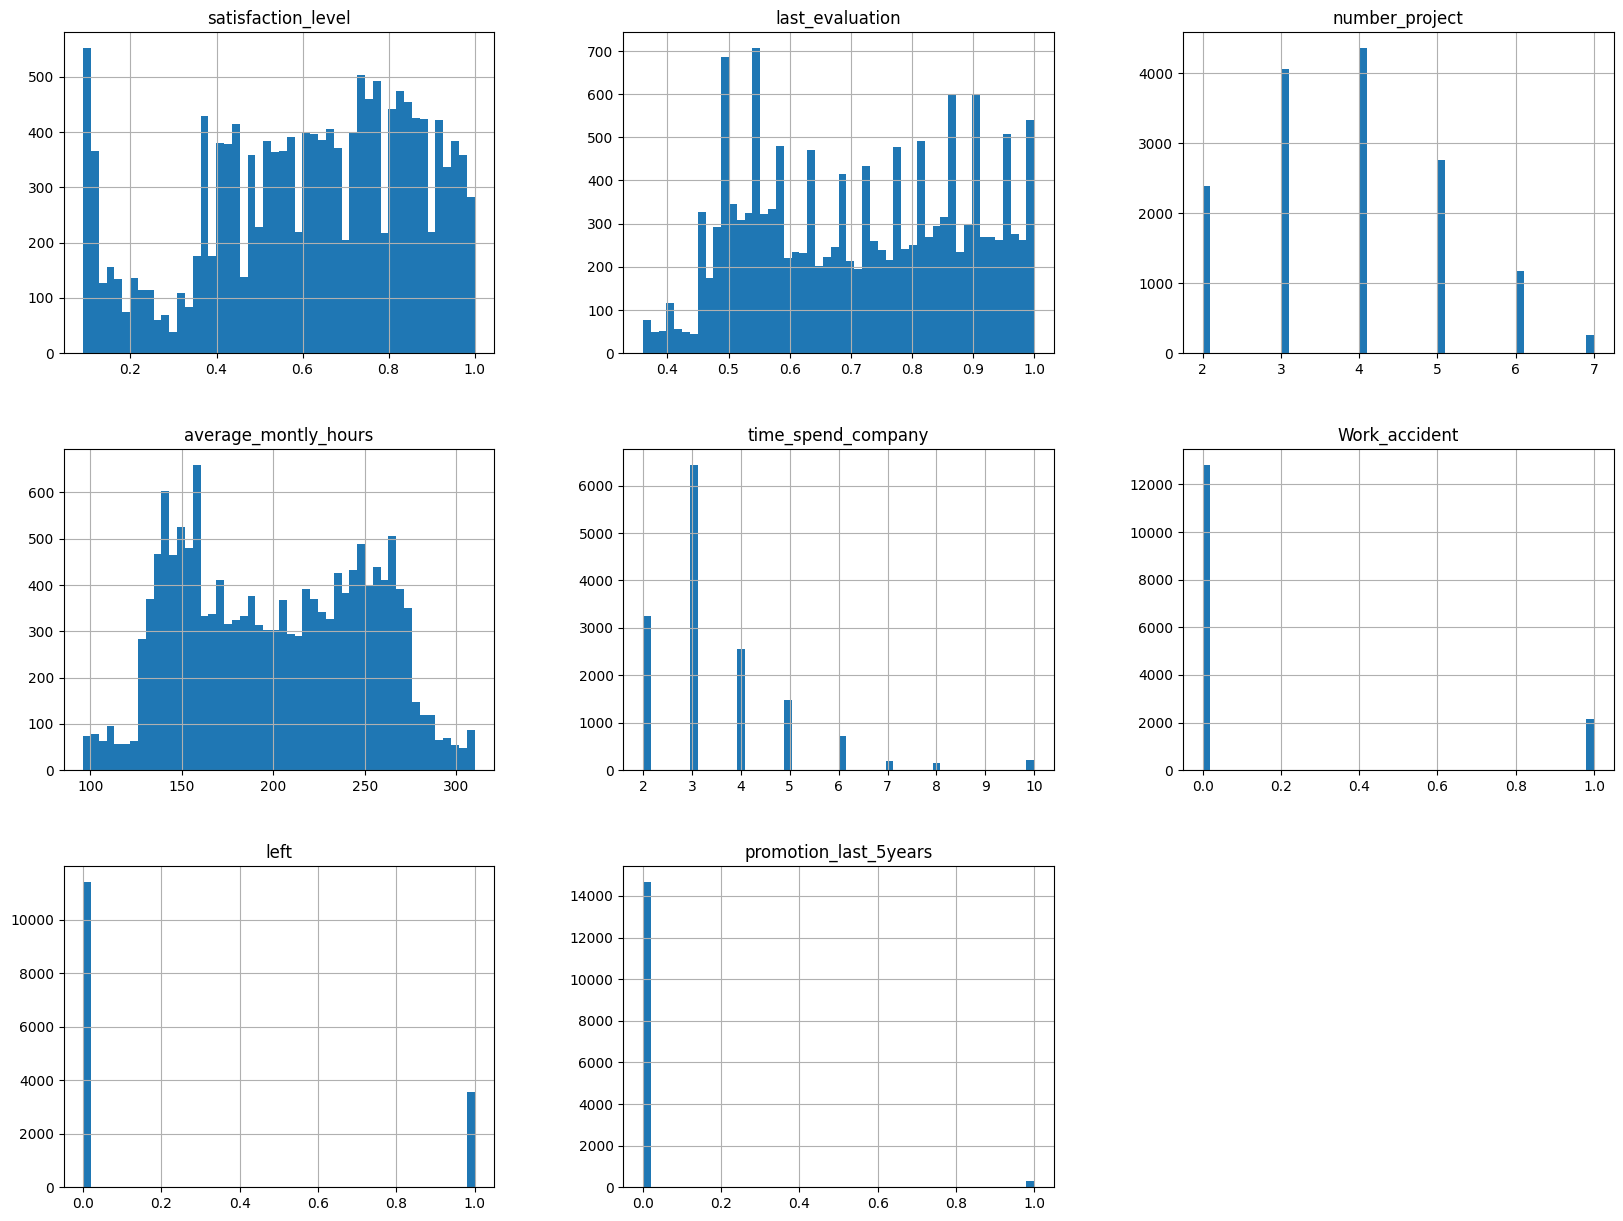

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

# CORRELATION MATRIX AND HEAT MAP

<AxesSubplot:>

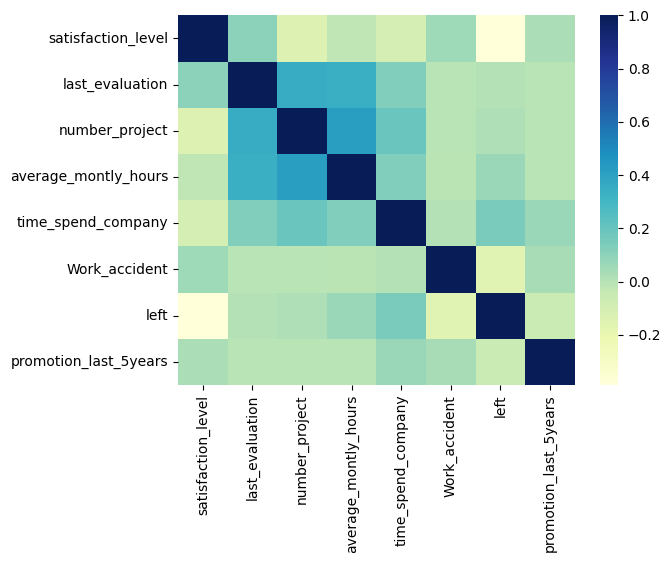

In [10]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap="YlGnBu")

In [11]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Evaluation V.S. Satisfaction
Summary:
-There are three distinct clusters for employees who left the company

Cluster 1 (“Overworked” Employees): These employees had satisfaction scores below 0.2 and evaluation scores above 0.75. Employees here were evaluated highly and felt bad at work.

Cluster 2 (“Under Performing Employees”): These employees had satisfaction scores between (0.35-0.5) and evaluation scores below 0.6. Employees here were evaluated poorly and felt bad at work. This is a typical reason why employees leave.

Cluster 3 (“Ideal Worker”): These employees had satisfaction scores between (0.7-1) and evaluation scores of (0.8-1). Employees here were evaluated highly and felt satisfied at work. 


In [12]:
labels=df["left"]
X=np.array(df)
labels=np.array(labels)

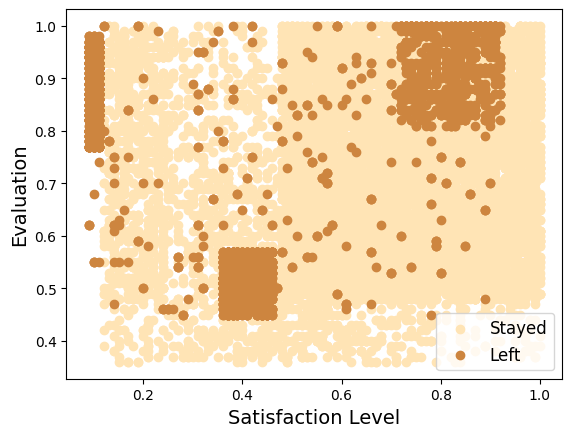

In [13]:

plt.scatter(X[labels==0, 0], X[labels==0, 1], c="moccasin", label="Stayed")
plt.scatter(X[labels==1, 0], X[labels==1, 1], c="peru", label="Left")
plt.xlabel("Satisfaction Level", fontsize=14)
plt.ylabel("Evaluation", fontsize=14)
plt.legend(fontsize=12)
plt.show()

# IMPORTANT FEATURE EXTRACTION

In [14]:
df2=df[['last_evaluation', 'number_project', 'average_montly_hours', 'satisfaction_level']]

In [15]:
df2

,last_evaluation,number_project,average_montly_hours,satisfaction_level
0,0.53,2,157,0.38
1,0.86,5,262,0.80
2,0.88,7,272,0.11
3,0.87,5,223,0.72
4,0.52,2,159,0.37
...,...,...,...,...
14994,0.57,2,151,0.40
14995,0.48,2,160,0.37
14996,0.53,2,143,0.37
14997,0.96,6,280,0.11


# CHECKING FOR OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa280a4b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa280a4bf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa280a1b370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa280a80550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa280a80820>],
 'means': []}

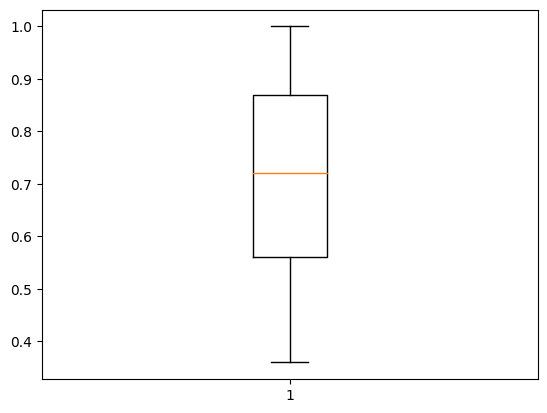

In [16]:
plt.boxplot(df2['last_evaluation'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa280991e40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2809923e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa280990a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa280992980>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa280992c50>],
 'means': []}

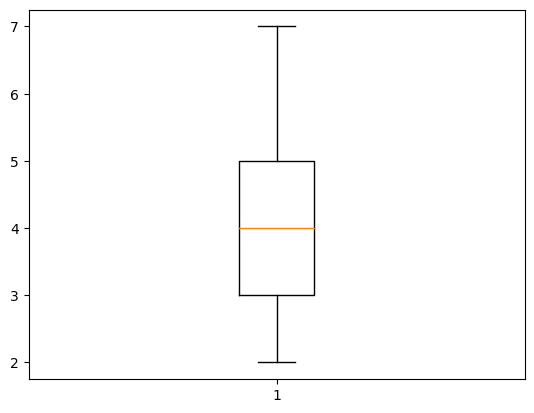

In [17]:
plt.boxplot(df2['number_project'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2808e7f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa280910550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2808e7ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa280910af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa280910dc0>],
 'means': []}

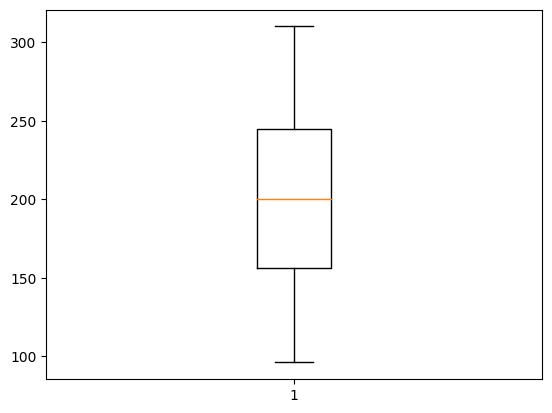

In [18]:
plt.boxplot(df2['average_montly_hours'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa280975b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa280976110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2809758a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2809766b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa280976980>],
 'means': []}

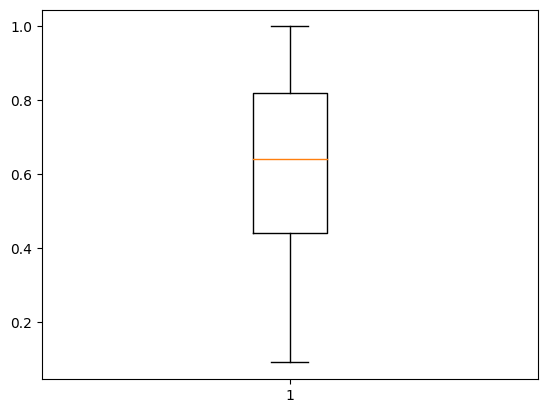

In [19]:
plt.boxplot(df2['satisfaction_level'])

# **DATA PREPROCESSING**

# SCALING THE DATA

In [20]:
scaler=StandardScaler()
df3=pd.DataFrame(scaler.fit_transform(df2))

In [21]:
df3.rename(columns={0: 'last_evaluation', 1: 'number_project', 2:'average_monthly_hours', 3:'satisfaction_level'}, inplace=True)

In [22]:
df3

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
0,-1.087275,-1.462863,-0.882040,-0.936495
1,0.840707,0.971113,1.220423,0.752814
2,0.957554,2.593763,1.420657,-2.022479
3,0.899131,0.971113,0.439508,0.431041
4,-1.145699,-1.462863,-0.841993,-0.976716
...,...,...,...,...
14994,-0.853580,-1.462863,-1.002181,-0.856051
14995,-1.379394,-1.462863,-0.821970,-0.976716
14996,-1.087275,-1.462863,-1.162368,-0.976716
14997,1.424944,1.782438,1.580845,-2.022479


In [23]:
df3['left']=df['left']

In [24]:
df3

,last_evaluation,number_project,average_monthly_hours,satisfaction_level,left
0,-1.087275,-1.462863,-0.882040,-0.936495,1
1,0.840707,0.971113,1.220423,0.752814,1
2,0.957554,2.593763,1.420657,-2.022479,1
3,0.899131,0.971113,0.439508,0.431041,1
4,-1.145699,-1.462863,-0.841993,-0.976716,1
...,...,...,...,...,...
14994,-0.853580,-1.462863,-1.002181,-0.856051,1
14995,-1.379394,-1.462863,-0.821970,-0.976716,1
14996,-1.087275,-1.462863,-1.162368,-0.976716,1
14997,1.424944,1.782438,1.580845,-2.022479,1


# SPLITTING THE DATA INTO TRAIN AND TEST

In [25]:
split=StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split.split(df3, df3["left"]):
    train_set=df3.loc[train_index]
    test_set=df3.loc[test_index]

# TRAIN DATA

In [26]:
train_set

,last_evaluation,number_project,average_monthly_hours,satisfaction_level,left
12896,-0.561462,0.159788,0.920071,0.471263,0
12545,1.658639,0.971113,0.699813,0.672371,1
14833,-0.970428,-1.462863,0.920071,-2.062701,1
8335,-1.204123,-1.462863,-1.502767,-0.091840,0
2724,-1.379394,0.159788,1.000165,0.270155,0
...,...,...,...,...,...
5251,-1.262546,0.159788,1.320540,-0.453835,0
14755,-1.320970,-1.462863,-1.322556,-0.735386,1
14268,0.548588,1.782438,2.161525,-2.062701,1
3211,1.074402,0.159788,-0.521618,-0.132062,0


# TEST DATA

In [27]:
test_set

,last_evaluation,number_project,average_monthly_hours,satisfaction_level,left
6910,1.658639,-0.651538,-1.522790,1.074587,0
2860,-0.210920,0.159788,-0.221266,1.517026,0
6286,-0.269343,-0.651538,-1.723025,-0.856051,0
12838,0.314894,-0.651538,-0.201242,1.476804,0
13692,0.081199,0.159788,-0.882040,0.873479,0
...,...,...,...,...,...
6736,-0.853580,-0.651538,0.559649,1.476804,0
5093,-0.970428,-0.651538,-0.581688,1.235474,0
6841,-1.379394,-0.651538,0.239274,1.155031,0
6413,-0.678309,-0.651538,0.459532,0.350598,0


# VERIFICATION OF STRATIFIED SHUFFLE SPLIT

In [28]:
turnover_rate = train_set.left.value_counts() / len(train_set)
turnover_rate

0    0.761897
1    0.238103
Name: left, dtype: float64

In [29]:
turnover_rate = test_set.left.value_counts() / len(test_set)
turnover_rate

0    0.762
1    0.238
Name: left, dtype: float64

In [30]:
X=train_set.loc[:, 'last_evaluation':'satisfaction_level']
X

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
12896,-0.561462,0.159788,0.920071,0.471263
12545,1.658639,0.971113,0.699813,0.672371
14833,-0.970428,-1.462863,0.920071,-2.062701
8335,-1.204123,-1.462863,-1.502767,-0.091840
2724,-1.379394,0.159788,1.000165,0.270155
...,...,...,...,...
5251,-1.262546,0.159788,1.320540,-0.453835
14755,-1.320970,-1.462863,-1.322556,-0.735386
14268,0.548588,1.782438,2.161525,-2.062701
3211,1.074402,0.159788,-0.521618,-0.132062


In [31]:
y=train_set.loc[:, 'left']
y

12896    0
12545    1
14833    1
8335     0
2724     0
        ..
5251     0
14755    1
14268    1
3211     0
1271     1
Name: left, Length: 11999, dtype: int64

# **MODELLING**

# **LOGISTIC REGRESSION**

In [32]:
classifier=linear_model.LogisticRegression()
classifier.fit(X, y)

LogisticRegression()

In [33]:
A=test_set.loc[:, 'last_evaluation':'satisfaction_level']
A

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
6910,1.658639,-0.651538,-1.522790,1.074587
2860,-0.210920,0.159788,-0.221266,1.517026
6286,-0.269343,-0.651538,-1.723025,-0.856051
12838,0.314894,-0.651538,-0.201242,1.476804
13692,0.081199,0.159788,-0.882040,0.873479
...,...,...,...,...
6736,-0.853580,-0.651538,0.559649,1.476804
5093,-0.970428,-0.651538,-0.581688,1.235474
6841,-1.379394,-0.651538,0.239274,1.155031
6413,-0.678309,-0.651538,0.459532,0.350598


In [34]:
b=test_set.loc[:, 'left']
b

6910     0
2860     0
6286     0
12838    0
13692    0
        ..
6736     0
5093     0
6841     0
6413     0
10564    0
Name: left, Length: 3000, dtype: int64

In [35]:
predictedclass=classifier.predict_proba(A)
predictedclass

array([[0.91618271, 0.08381729],
       [0.95758971, 0.04241029],
       [0.67570845, 0.32429155],
       ...,
       [0.92769978, 0.07230022],
       [0.82674692, 0.17325308],
       [0.89946629, 0.10053371]])

In [36]:
l=[]
for i in predictedclass:
    if(i[1]>=0.5):
        l.append(1)
    else:
        l.append(0)

In [37]:
total=0
correct=0
for i in range(len(l)):
  if(l[i]==b.iloc[i]):
    correct+=1
  total+=1

accuracy=(correct/total)*100
accuracy

78.63333333333333

In [38]:
print(classification_report(b, classifier.predict(A)))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2286
           1       0.62      0.27      0.37       714

    accuracy                           0.79      3000
   macro avg       0.71      0.61      0.62      3000
weighted avg       0.76      0.79      0.75      3000



[[2168  118]
 [ 523  191]]


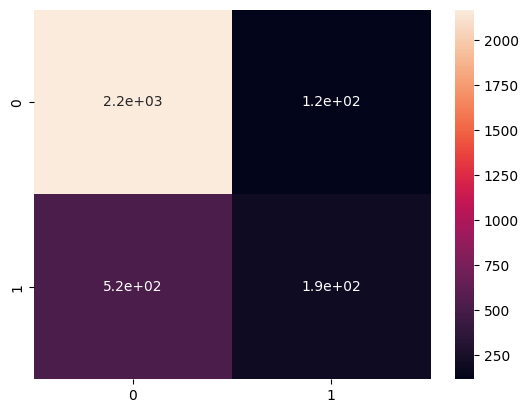

In [39]:
cf_matrix=confusion_matrix(b, classifier.predict(A))
sns.heatmap(cf_matrix, annot=True, xticklabels = [0,1], yticklabels = [0,1])
print(cf_matrix)

# **DECISION TREE**

In [40]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X, y)

In [41]:
importances = dtree.feature_importances_
feat_names = df.drop(['left'],axis=1).columns

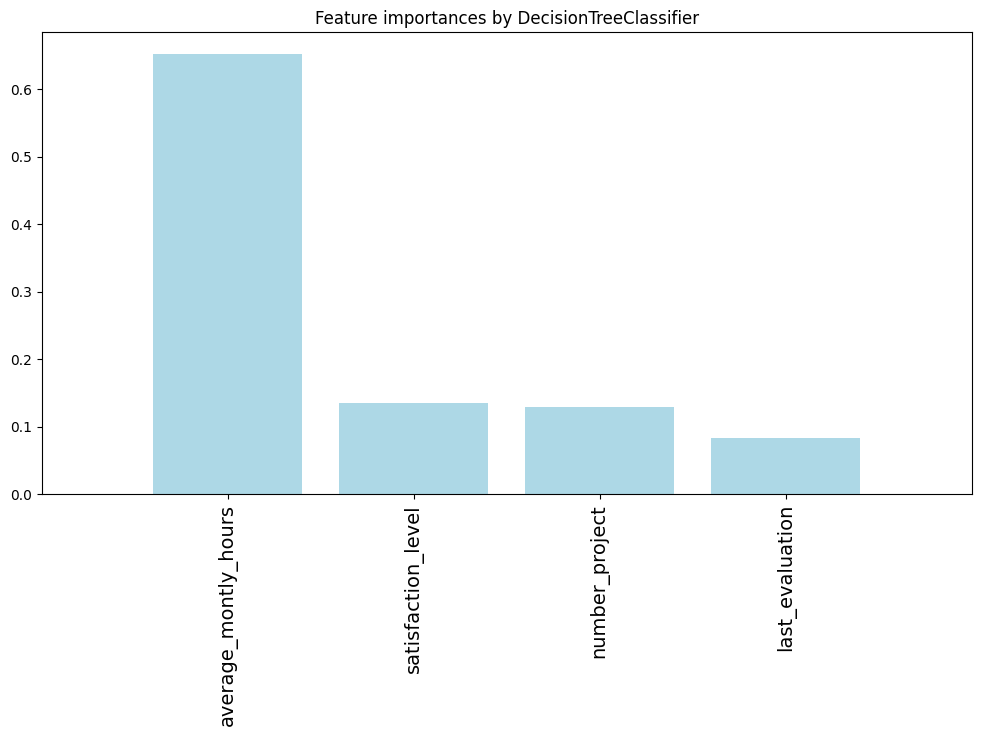

In [42]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [43]:
y_pred = dtree.predict(A)

In [44]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
labels=[0,1]

[[2152  134]
 [  62  652]]


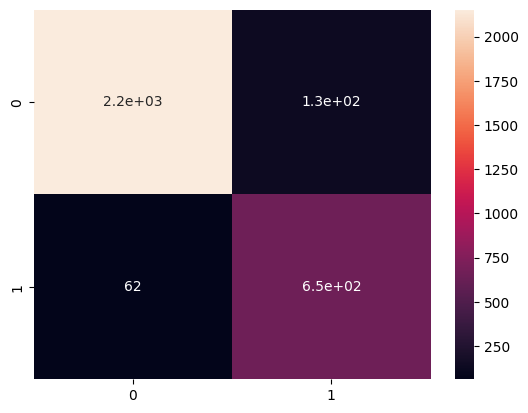

In [46]:
cf_matrix = confusion_matrix(b, y_pred)
sns.heatmap(cf_matrix, annot=True, xticklabels = labels, yticklabels = labels)
print(cf_matrix)

In [47]:
print(classification_report(b, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2286
           1       0.83      0.91      0.87       714

    accuracy                           0.93      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.94      0.93      0.94      3000



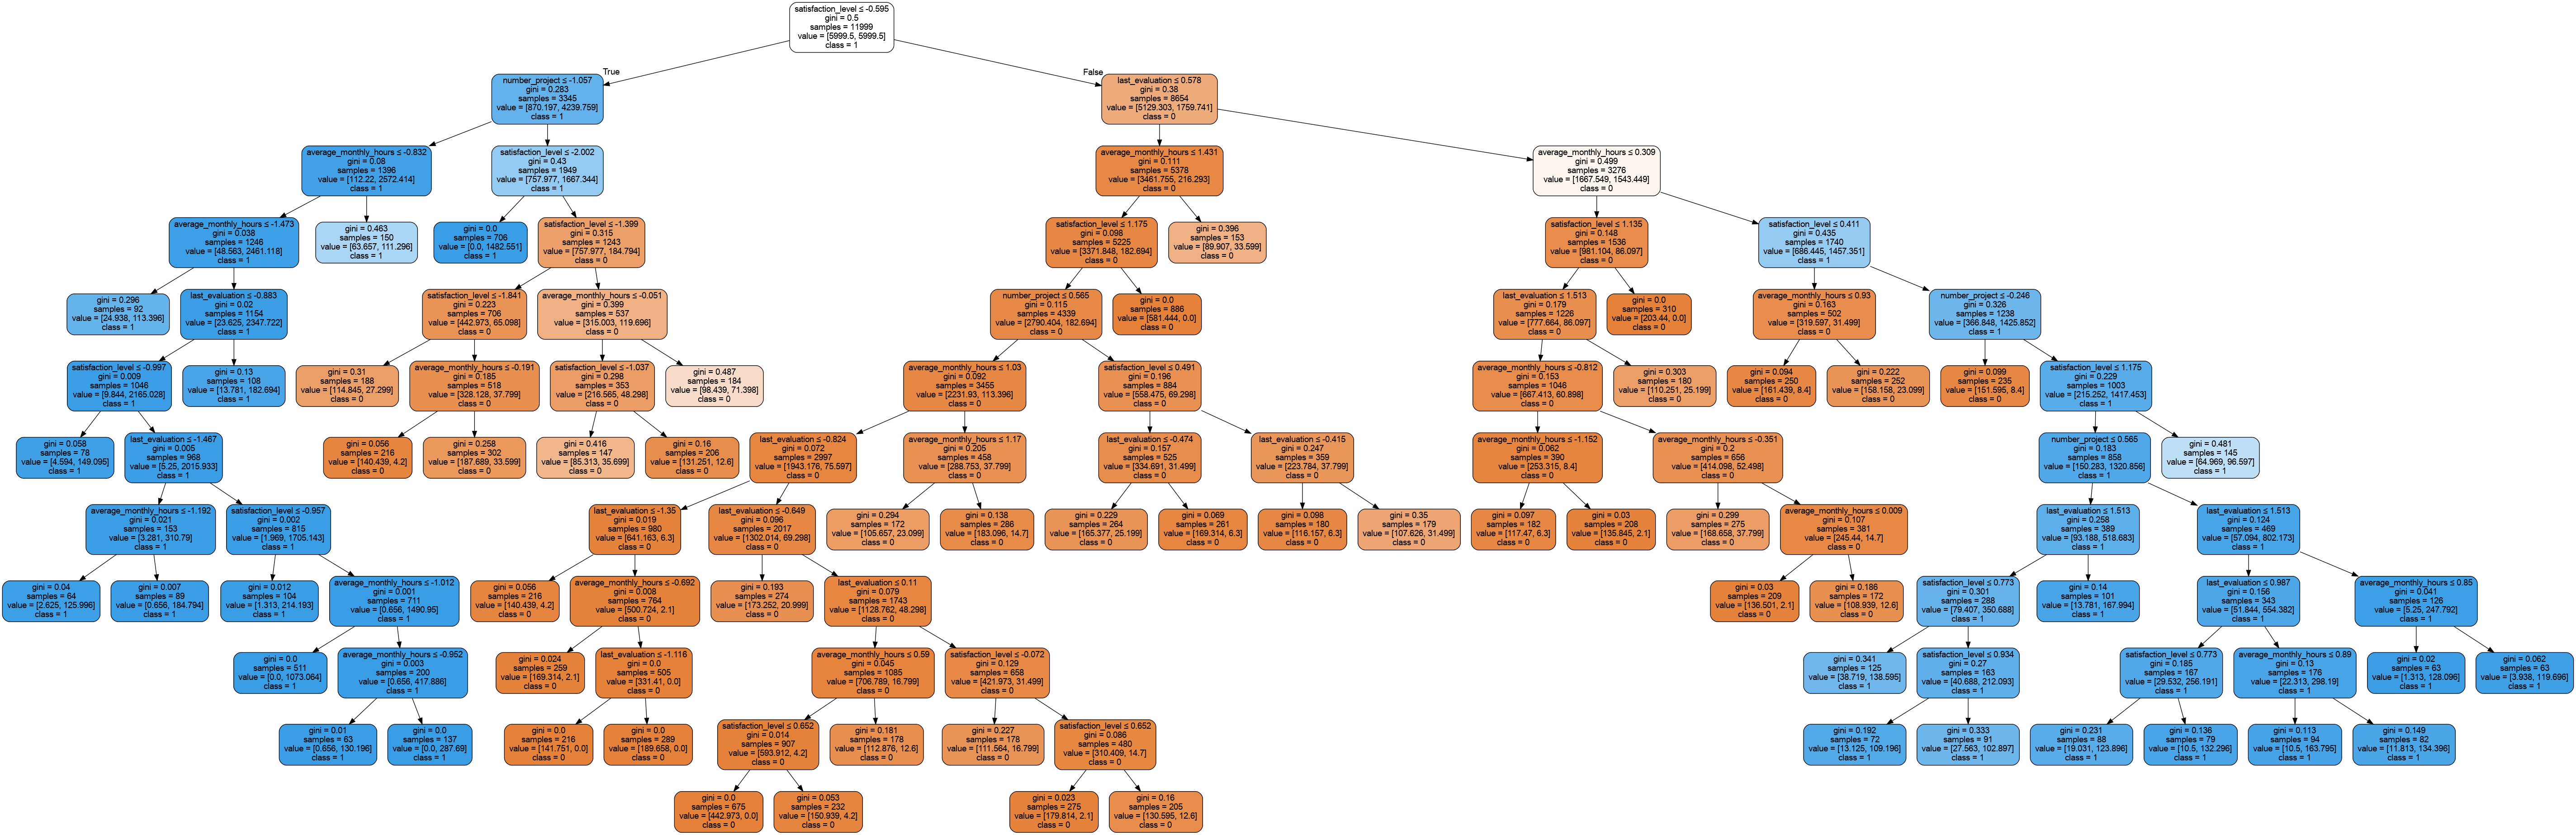

In [48]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


# **KMEANS**

In [49]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [50]:
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df["left"]==1][["satisfaction_level","last_evaluation"]])

KMeans(n_clusters=3, random_state=2)

In [51]:
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

# **K-Means** Clustering of Employee Turnover

# Cluster 1 (Blue): Hard-working and Sad Employees
# Cluster 2 (Red): Bad and Sad Employee
# Cluster 3 (Green): Hard-working and Happy Employee

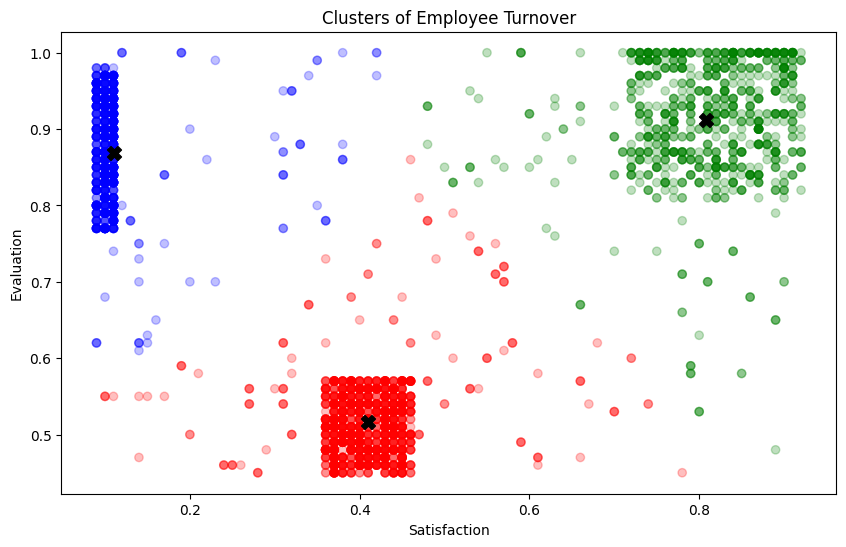

In [52]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(df[df["left"]==1]["satisfaction_level"], df[df["left"]==1]["last_evaluation"], alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [53]:
kmeans.cluster_centers_

array([[0.80851586, 0.91170931],
       [0.41014545, 0.51698182],
       [0.11115466, 0.86930085]])

# **RANDOM FOREST**

In [54]:
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )


In [55]:
X=train_set.loc[:, 'last_evaluation':'satisfaction_level']
X

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
12896,-0.561462,0.159788,0.920071,0.471263
12545,1.658639,0.971113,0.699813,0.672371
14833,-0.970428,-1.462863,0.920071,-2.062701
8335,-1.204123,-1.462863,-1.502767,-0.091840
2724,-1.379394,0.159788,1.000165,0.270155
...,...,...,...,...
5251,-1.262546,0.159788,1.320540,-0.453835
14755,-1.320970,-1.462863,-1.322556,-0.735386
14268,0.548588,1.782438,2.161525,-2.062701
3211,1.074402,0.159788,-0.521618,-0.132062


In [56]:
y=train_set.loc[:, 'left']
y

12896    0
12545    1
14833    1
8335     0
2724     0
        ..
5251     0
14755    1
14268    1
3211     0
1271     1
Name: left, Length: 11999, dtype: int64

In [57]:
A=test_set.loc[:, 'last_evaluation':'satisfaction_level']
A

,last_evaluation,number_project,average_monthly_hours,satisfaction_level
6910,1.658639,-0.651538,-1.522790,1.074587
2860,-0.210920,0.159788,-0.221266,1.517026
6286,-0.269343,-0.651538,-1.723025,-0.856051
12838,0.314894,-0.651538,-0.201242,1.476804
13692,0.081199,0.159788,-0.882040,0.873479
...,...,...,...,...
6736,-0.853580,-0.651538,0.559649,1.476804
5093,-0.970428,-0.651538,-0.581688,1.235474
6841,-1.379394,-0.651538,0.239274,1.155031
6413,-0.678309,-0.651538,0.459532,0.350598


In [58]:
b=test_set.loc[:, 'left']
b

6910     0
2860     0
6286     0
12838    0
13692    0
        ..
6736     0
5093     0
6841     0
6413     0
10564    0
Name: left, Length: 3000, dtype: int64

In [59]:
rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=1000)

In [60]:
y_pred=rf.predict(A)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[[2224   62]
 [  33  681]]


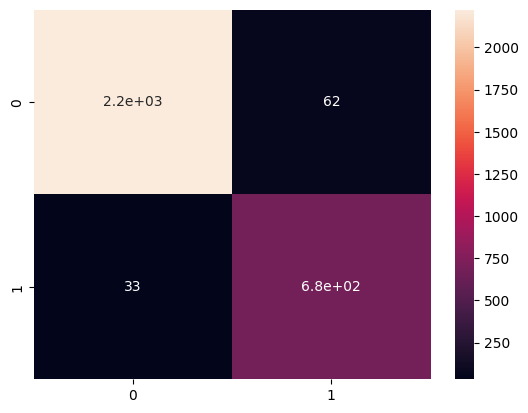

In [61]:
cf_matrix=confusion_matrix(b, y_pred)
sns.heatmap(cf_matrix, annot=True, xticklabels = [0,1], yticklabels = [0,1])
print(cf_matrix)

In [62]:
print(classification_report(b, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2286
           1       0.92      0.95      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



# **ADABOOST**

In [63]:
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)

In [64]:
ada.fit(X,y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=400)

In [65]:
y_pred=ada.predict(A)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

[[2238   48]
 [ 190  524]]


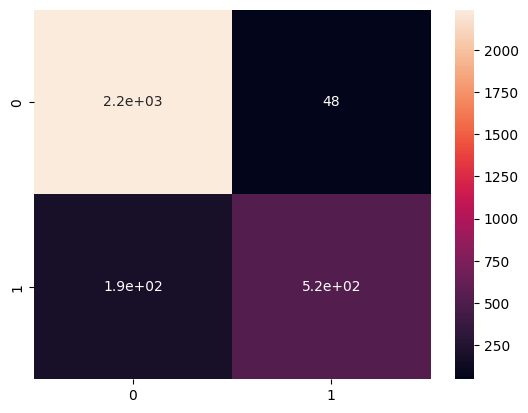

In [66]:
cf_matrix=confusion_matrix(b, y_pred)
sns.heatmap(cf_matrix, annot=True, xticklabels = [0,1], yticklabels = [0,1])
print(cf_matrix)

In [67]:
print(classification_report(b, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2286
           1       0.92      0.73      0.81       714

    accuracy                           0.92      3000
   macro avg       0.92      0.86      0.88      3000
weighted avg       0.92      0.92      0.92      3000

